In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

### 1.1. ARIMA
- territories removed
- focused on top 3 disasters (severe storm, hurricane, flood)

In [ ]:
# Load cleaned data
clean_state_type_df=pd.read_parquet('../data/clean_state_type_df.parquet')

In [15]:
# Train-test split
split_date='2019-01-01'
train=clean_state_type_df[:split_date]['disaster_count']
test=clean_state_type_df[split_date:]['disaster_count']

In [16]:
# ARIMA model
model=ARIMA(train, order=(1, 1, 1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=len(test))

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


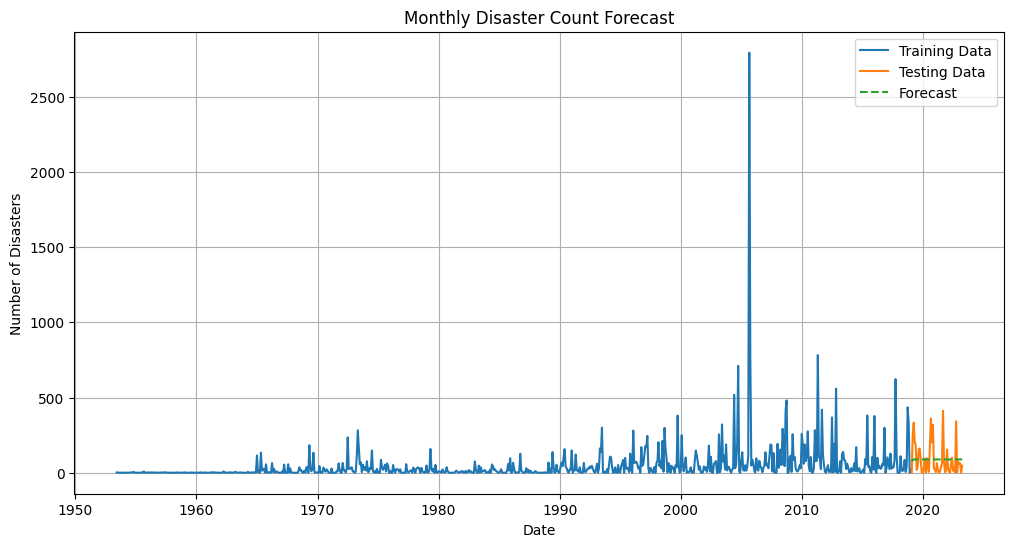

In [17]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Monthly Disaster Count Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Evaluate model
rmse=np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 107.91252000062606


### 1.2. ARIMA
- territories removed
- focused on top 3 disasters (severe storm, hurricane, flood)
- year 2009 to 2019 (Hurricane Katrina)

In [22]:
# Load cleaned data (territories removed, focused on top 3 disasters, after 2009)
clean_state_type_09_df=pd.read_parquet('../data/clean_state_type_09_df.parquet')

In [23]:
# Train-test split
split_date='2019-01-01'
train=clean_state_type_09_df[:split_date]['disaster_count']
test=clean_state_type_09_df[split_date:]['disaster_count']

In [24]:
# ARIMA model
model=ARIMA(train, order=(1, 1, 1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=len(test))

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


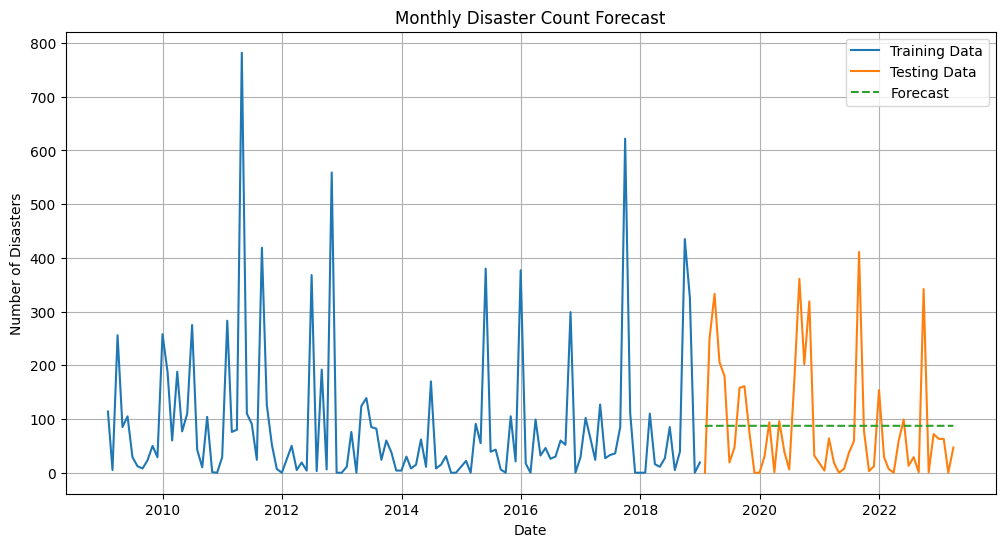

In [25]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Monthly Disaster Count Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Evaluate model
rmse=np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 108.00645890205558
